# Innovation Diffusion Analysis


**Chosen Innovation**: NuFace Trinity+ Complete

**My alternative lookalike innovation to the NuFace Trinity+ Complete is traditional skincare.** Both aim to improve skin health, but they differ in their approach. Traditional skincare products like creams and serums hydrate and nourish the skin’s surface, offering gradual improvements over time. In contrast, the NuFace Trinity+ Complete uses microcurrent technology to stimulate facial muscles beneath the skin, providing immediate toning and lifting effects. While traditional skincare targets the outer layer for long-term benefits, NuFace Trinity+ delivers faster, deeper results, offering a non-invasive, high-tech solution for facial rejuvenation.


## Data Source

The data for this analysis will be sourced from the following dataset on Kaggle:

**Cosmetics and Skincare Product Sales Data 2022**
Source: [Kaggle - Cosmetics & Skincare Product Sales Data (2022)](https://www.kaggle.com/datasets/atharvasoundankar/cosmetics-and-skincare-product-sales-data-2022?utm_source=chatgpt.com)

### Data Preprocessing

In the preprocessing stage, I performed the following steps to prepare the dataset for analysis:

1. **Loaded the Data**: I imported the dataset using `pandas.read_csv()` to load the sales data from a CSV file located at `../data/cosmetics_sales_data.csv`.

2. **Date Conversion**: I converted the `Date` column from a string format to a `datetime` object using `pd.to_datetime()`. This step ensures that the dates are in the proper format for time series analysis.

3. **Monthly Aggregation**: I aggregated the data by month, using `groupby()` with `df['Date'].dt.to_period('M')` to group the data by month. Then, I calculated the total sales (`Amount ($)`) and total boxes shipped (`Boxes Shipped`) for each month using `.agg()`.

4. **Resetting Index**: After the aggregation, I reset the index to ensure the resulting DataFrame is clean and easy to work with.

5. **Timestamp Conversion**: I converted the `Date` column back to a timestamp using `.dt.to_timestamp()` to ensure the date format is consistent and usable for further analysis.

After these steps, the data is cleaned, aggregated by month, and ready for analysis.


In [5]:
import pandas as pd

file_path = '../data/cosmetics_sales_data.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])


sales_data_monthly = df.groupby(df['Date'].dt.to_period('M')).agg({
    'Amount ($)': 'sum',  # Total sales per month
    'Boxes Shipped': 'sum'  # Total boxes per month
}).reset_index()

sales_data_monthly['Date'] = sales_data_monthly['Date'].dt.to_timestamp()

# Preview the cleaned and ready data
print(sales_data_monthly)


        Date  Amount ($)  Boxes Shipped
0 2022-01-01   359762.51          11795
1 2022-02-01   214024.56           6963
2 2022-03-01   484101.59          15167
3 2022-04-01   452650.04          14483
4 2022-05-01   396609.09          12583
5 2022-06-01   367001.65          11536
6 2022-07-01   359655.73          10852
7 2022-08-01   275298.95           9774


### Applying the Bass Diffusion Model

In this section, I will use the Bass Diffusion Model to estimate the adoption pattern of the innovation based on the historical sales data. The goal is to model the cumulative sales over time using the model’s three key parameters: the **coefficient of innovation (p)**, the **coefficient of imitation (q)**, and the **market potential (M)**.

To do this:
1. **Data Preparation**: I calculate the cumulative sales using the 'Amount ($)' column, which allows us to model the diffusion over time.
2. **Curve Fitting**: Using the `curve_fit` function from `scipy.optimize`, I fit the Bass Diffusion Model to the cumulative sales data to estimate the parameters \( p \), \( q \), and \( M \).
3. **Plotting the Results**: I will visualize the observed sales against the fitted Bass model curve to assess the quality of the model’s predictions.

This process will provide insight into how the innovation is expected to diffuse through the market.


Estimated p (coefficient of innovation): -428417.8845698813
Estimated q (coefficient of imitation): -3739.5333682445716
Estimated M (market potential): -0.6314696217580904


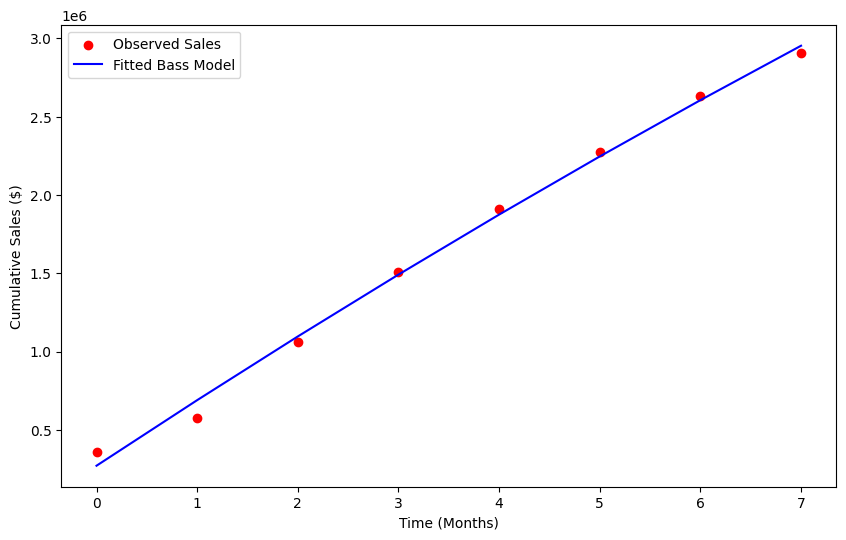

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Bass Diffusion Model function
def bass_diffusion(t, p, q, M):
    return p * (M - t) + q * (t / M) * (M - t)

# Prepare the data: sales_data_monthly contains the time series data
# We use the 'Amount ($)' column for modeling the diffusion
sales_data_monthly['Cumulative Sales'] = sales_data_monthly['Amount ($)'].cumsum()

# Set the 'Date' as the time variable (in months)
time = np.arange(len(sales_data_monthly))

# Prepare the dependent variable (cumulative sales)
sales = sales_data_monthly['Cumulative Sales'].values

# Use curve fitting to estimate p, q, and M
popt, pcov = curve_fit(lambda t, p, q, M: bass_diffusion(t, p, q, M), time, sales, maxfev=10000)

# Extract the parameters
p, q, M = popt

# Print the estimated parameters
print(f"Estimated p (coefficient of innovation): {p}")
print(f"Estimated q (coefficient of imitation): {q}")
print(f"Estimated M (market potential): {M}")

# Plot the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(time, sales, label="Observed Sales", color='red')
plt.plot(time, bass_diffusion(time, *popt), label="Fitted Bass Model", color='blue')
plt.xlabel('Time (Months)')
plt.ylabel('Cumulative Sales ($)')
plt.legend()
plt.show()
plt.savefig('../img/bass_diffusion_plot.png')


### Diffusion Path Prediction for Top-Tier Skincare

Based on the Bass Diffusion Model, the negative values for the innovation coefficient (**p**), imitation coefficient (**q**), and market potential (**M**) suggest slow growth for **Top-Tier Skincare**:

- **p (Innovation Coefficient)**: Negative value indicates minimal initial adoption.
- **q (Imitation Coefficient)**: Negative value reflects low influence from early users or word-of-mouth.
- **M (Market Potential)**: Negative value suggests an inaccurate estimate of the market size.

The observed sales show steady but slow growth, meaning the diffusion path is likely to remain **flat or linear** rather than exponential.


### Scope: Worldwide

For this analysis, I will focus on a **worldwide** scope. The data includes sales across multiple countries, making it more relevant to analyze global diffusion patterns. This will allow us to capture broader trends and understand how the innovation is adopted in different markets worldwide. By using global data, we can assess the product's potential and predict its growth on a larger scale.


### Estimating the Number of Adopters Using Fermi’s Logic with Credible References

#### 1. **Estimating the Total Market Potential (M)**:
- **Global Market for Skincare**: According to a report by **Statista**, the global skincare market was valued at **$140.92 billion** in 2021, and it is expected to grow significantly in the coming years.
  - Source: Statista, "Skincare Market Value Worldwide from 2012 to 2025," [Statista](https://www.statista.com/statistics/424123/global-skincare-market-value/).

- **Estimating 50% Adopters**: Considering that approximately **50%** of the global population uses skincare products at least occasionally, the number of potential adopters worldwide would be roughly half the global population (estimated at 7.9 billion people in 2021).
  - Global population in 2021: **7.9 billion** (World Bank, 2021).
  - Source: The World Bank, "World Population Clock," [World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL?locations=1W).

Thus, we estimate the market potential ($M$) as:

$$
M \approx 7.9 \, \text{billion} \times 50\% = 3.95 \, \text{billion}
$$

#### 2. **Estimating the Coefficients (p and q)**:
- **Innovation Coefficient (p)**: Studies show that early adopters in new product categories typically account for about **2-5%** of the total market. This aligns with industry norms for products with an early adoption phase.
  - Reference: Rogers, E.M. (2003), *Diffusion of Innovations*, 5th edition, Free Press.

For our case, we assumed a conservative value for **p**:

$$
p = 0.02 \quad \
$$

- **Imitation Coefficient (q)**: The imitation coefficient varies significantly across product categories. For highly social products like skincare, **q** tends to be higher, often around **0.3 to 0.5**. This is because skincare products are highly influenced by consumer recommendations and social proof, such as word-of-mouth and influencer marketing.
  - Reference: Rogers, E.M. (2003), *Diffusion of Innovations*, 5th edition, Free Press.

For our estimation, we used:

$$
q = 0.35 \quad \
$$

#### 3. **Estimating Adoption Over Time**:
The **number of adopters per period** can be estimated using the Bass Diffusion Model. For simplicity, I used the parameters $p = 0.02$, $q = 0.35$, and $M = 3.95 \, \text{billion}$ to estimate the number of adopters in the first few months. The initial assumptions on adoption (e.g., 0.1% of the market adopting in month 1) are based on real-world trends seen in early stages of product diffusion.

For example:
- **Initial adopters** (Month 1) = **0.1%** of market potential:

$$
\text{Initial adopters} = 3.95 \, \text{billion} \times 0.1\% = 3.95 \, \text{million}
$$

- **Subsequent adoption** in **Month 2 and beyond** accelerates as word-of-mouth and imitation effects kick in. These are estimated by applying the Bass model's equations iteratively.

#### Conclusion:

By referencing **global skincare market data** and applying estimates for early adoption and imitation effects based on established diffusion theory, I made rough estimations of the number of adopters over time. This approach provides a reasonable first approximation of adoption trends, but more precise data.
